# Seeing how the fourier square series varies with the number of terms one decides to implement, and seeing this in a graph  #

## Frederico Wieser 16/11/2018 ##

In this notebook we will be introducing the fourier square series and will be explaining how the fourier series varies over the number of terms we have in the series with an interactive plot and explanation at the end of the notebook.

<div class="alert alert-success">
<h2> The task: </h2>
<br>
This is a template for the session 6 Fourier Square Wave task. Your job is to fill in the blanks in the code and add text cells where needed. 
<br>
All the instructions for the task are in green text cells like this one. You can keep these cells in your submitted workbook if you want, but they will be ignored by the markers.
<br>
You will be graded on your completed code, and the text cells that you add yourself. Some template text cells are already added, but feel free to add more.

</div>

<div class="alert alert-success">
Replace the title/header of this notebook with your own title, and include a suitable introduction (you can leave this until the end, but don't forget!)

<br>
Complete the cell below to import the functions you will need in order to be able to use the same interactive functions you saw in the script.
<div>


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### YOU NEED TO IMPORT TWO MORE MODULE FUNCTIONS HERE ###
from ipywidgets import interactive
from IPython.display import display
######################################################################

# The line below increases the default figure size.
# Useful if you are on a large screen, you may want to
# edit it to taste or comment it out
# if you are on a small-screen laptop.
# Don't make the figure so large that you also need to adjust the text size though!
# The default proportions are there for a reason...
plt.rcParams['figure.figsize'] = 12, 8 



<div class="alert alert-success">
The code cell below defines our initial data. A value for $L$, the period of the function, has already been set. Add a line that will create an array, named `x`, of values to use for the x-values for the plot from 0 to $5\pi$, with an appropriate number of points to result in a smooth function on the plot (you can come back and adjust this later).
<div>


In [2]:
### Set up initial data
L = np.pi # period of the function is [−L,L]
##### STUDENT COMPLETED LINE #####
x = np.linspace(0, 5*np.pi, 10000) #Setting up a 10000 element array from 0 to 5*Pi for the plot 
###################################

<div class="alert alert-success">
The code cell below contains the start of a function that needs to calculate the Fourier series for a square wave, i.e. it codes the mathematical function
$$f_\text{square}(x) = \frac{4}{\pi} \sum_{n = 1, 3, 5, \ldots}^{\infty} \frac{1}{n} \sin\left(\frac{n \pi x}{L}\right) \qquad \qquad (1)$$ 
for all $n$ up to and including $n = $ <tt>n_terms</tt> (as we will need to truncate our series at some finite point rather than continuing all the way to $n = \infty$). The docstring has already been written for you.

<ul>
<li>
Complete the function to calculate the Fourier series for the number of terms <tt>n_terms</tt> specified in the function input. </li>
<li> <b>Don't change any of the variable names or the docstring. </b>Follow the specification given. </li>
<li>Use a new text cell, as well as appropriate code comments, to describe your function.</li>
</ul>

<b> Note:</b> Here the variable <tt>L</tt> will act as a _global_ variable. It is defined in the cell above, and when you reference <tt>L</tt> in your function it will use that value of <tt>L</tt>, without having to explicitly pass it to the function. In other words, you don't need to redefine <tt>L</tt> within your function.

<b> HINTS:</b> You will need to use the same kind of looping structure that you used in the series summation task for session 2. Think carefully about the differences and similarities between that summation and this one. In particular:
<ul>
<li>What are the start and end points of the summation?</li>
<li>Are we summing over all values of n? How will you deal with this?</li>
<li>Note that we're going to be calculating this for an array of x-values - however, as we saw in the "sincfn" example, this doesn't make any difference to the way the function is coded; it will automatically work either for a single x-value or an array.</li>
</ul>

<div>


USE THIS TEXT CELL TO DESCRIBE YOUR FUNCTION

In [3]:
def fourier_sum(x_input,n_terms):
    '''function that creates the Fourier series for square wave.
    Inputs:
    x_input: array of x-values or single x-value
    n_terms: maximum value of n in summation from eqn(1) above
    Returns:
    fourier: array of y-values for Fourier square wave
    '''
    #### STUDENT COMPLETED CELL ####
    # Write code here to satisfy the specification given 
    # in the docstring.
    
    j = 1  #Starting a counter which increases by 2 each time a loop happens
    fsum = 0 #Initialising the fourier sum before it has terms added to it by the while loop

    while j <= n_terms:
        term = (4/np.pi)*(1/j)*np.sin((j*np.pi*x_input)/L) #The unique term which changes every time the function loops
        fsum = fsum + term #Updating the fourier sum with the new term of the loop
        j = j + 2 #Increasing the counter by 2 since the fourier serier only itterates over odd numbers
    
    return fsum #Returning our fourier sum value according to the 2 parameters originally inputed to the function
    ################################

<div class="alert alert-success">
The code cell below will allow you to check that your <tt>fourier_sum</tt> function is working correctly. Does it generate the correct output for the given inputs? You should debug your function before proceeding. However, if you can't find the source of any problem it may be worth also writing the function that will plot the Fourier series (below!), in case looking at a plot of the function over the whole x-range reveals the source of the problem.
</div>

In [4]:
# check all is well before proceeding!
print("At x = pi and n_terms = 1, my function returns", fourier_sum(np.pi,1), "(it should be zero)")
print("At x = pi/2 and n_terms = 5, my function returns", fourier_sum(np.pi/2,5), "(it should be 1.10347...)")

At x = pi and n_terms = 1, my function returns 1.5592687330077502e-16 (it should be zero)
At x = pi/2 and n_terms = 5, my function returns 1.1034742721038078 (it should be 1.10347...)


<div class="alert alert-success">
Now you need to write a function that will plot the Fourier series.

The function in the code cell below, when completed, should 
<ul>
<li>call your <tt>fourier_sum</tt> function from above to calculate the Fourier series for the number of terms as given in the input (i.e. n_terms); then</li>
<li> plot it on a suitably labelled graph.</li>
</ul><br>
Don't forget the docstring! <br><br>
Also remember that if you are using Desktop@UCL you will need to include `plt.show()` at the end of your function.

<div>


In [5]:
def plot_fourier(n_terms):
    #### STUDENT COMPLETED CELL ####
    y = fourier_sum(x,n_terms) #setting up a function where the number of terms in the fourier series is the only variable
    plt.figure() #Initialising the plot
    plt.plot(x, y) #Plotting our relationship
    plt.grid(True) #Plots a grip in the backdrop of the data to give reference for the user.
    plt.title("Fourier Series for a Square wave") #Setting the title of graph.
    plt.xlabel("x") #Setting the x-axis label.
    plt.ylabel("Fourier Sum") #Setting the y-axis label.
    return plt.show() #Outputing the graph
    ################################
    

<div class="alert alert-success">
Now test that everything is running OK before you attempt to use the interactive slider. Add a single line in the cell below that will call your function to calculate and plot your Fourier series with $n= 3$. Does this look like how you'd expect? If not, go back and adjust your code until it does. Check it with other values of $n$ as well, and make sure you're happy with the results.
<div>


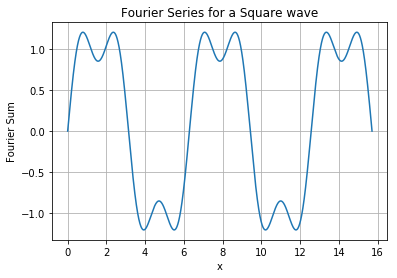

In [6]:
#### STUDENT COMPLETED CELL ####
################################
plot_fourier(3)

<div class="alert alert-success">
The final code cell needs to plot your Fourier series with a slider so that you can vary the number of terms in the series and see how the square wave builds up as you move the slider and increase the number of terms in the series. Choose a sensible maximum number of terms (i.e. use your judgement to consider when adding extra terms makes the slider hard to use, or hard to see the changes in the plot, or slows down the working of the code).

<br> 
Use a text cell to explain
<ul>
<li> Your choice of maximum number of terms </li>
<li> What is happening when the slider moves from 1$\rightarrow$2,  3$\rightarrow$4, 5$\rightarrow$6 etc.</li>

<div>


In [7]:
### STUDENT COMPLETED CELL ###
##############################
#generate interactive plot
plot = interactive(plot_fourier, n_terms=(1,100,1))
display(plot)

interactive(children=(IntSlider(value=50, description='n_terms', min=1), Output()), _dom_classes=('widget-inte…

I have chosen to do a maximum number of 100 since as we reach this limit it is clear to see the square shape of the fourier series begin to take shape. 1 to 2, the graph stays sinusoidal. 2 to 3, the maximum and minimum of the sinusoidal shape now invert and point toward the x-axis. 3 to 4, not much change. 4 to 5, we now have 2 indents in the peak of our originally sinusoidal curve. These indents are of a smaller amplitude and have caused the sinusoidal graph peaks to become wider. We can extrapolate from this that as we continue adding 2 to the n_terms the number of indents will increase by one with smaller amplitudes and broader peaks. Which means that as we approach infinity this fourier sum would become more and mre square. 